# Data Loading 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
stamps_df=pd.read_csv(r'C:\Users\saisa\Desktop\Resume and palcement\Telegana DashBoard Python\fact_stamps.csv',parse_dates=['month'])
transport_df=pd.read_csv(r"C:\Users\saisa\Desktop\Resume and palcement\Telegana DashBoard Python\fact_transport.csv",parse_dates=['month'])
ipass_df=pd.read_csv(r"C:\Users\saisa\Desktop\Resume and palcement\Telegana DashBoard Python\fact_TS_iPASS.csv",parse_dates=['month'])
dim_date_df=pd.read_csv(r"C:\Users\saisa\Desktop\Resume and palcement\Telegana DashBoard Python\dim_date.csv",parse_dates=['month'])
dim_districts_df=pd.read_csv(r"C:\Users\saisa\Desktop\Resume and palcement\Telegana DashBoard Python\dim_districts.csv")

# Data Pre-Processing and Data Cleaning

In [4]:
stamps_df.head(5)

,dist_code,month,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev
0,14_1,2019-04-01,4533,59236363,0,0
1,17_3,2019-04-01,4151,41508762,0,0
2,20_3,2019-04-01,2116,23674170,0,0
3,21_5,2019-04-01,1089,15915285,0,0
4,23_1,2019-04-01,6133,82593256,0,0


In [5]:
stamps_df.dtypes

dist_code                           object
month                       datetime64[ns]
documents_registered_cnt             int64
documents_registered_rev             int64
estamps_challans_cnt                 int64
estamps_challans_rev                 int64
dtype: object

In [6]:
stamps_df.isnull().sum()

dist_code                   0
month                       0
documents_registered_cnt    0
documents_registered_rev    0
estamps_challans_cnt        0
estamps_challans_rev        0
dtype: int64

In [7]:
stamps=stamps_df.duplicated().any()

In [8]:
stamps

False

In [9]:
stamps_df.columns

Index(['dist_code', 'month', 'documents_registered_cnt',
       'documents_registered_rev', 'estamps_challans_cnt',
       'estamps_challans_rev'],
      dtype='object')

In [10]:
stamps_df.shape

(1504, 6)

In [11]:
transport_df.head(5)

,dist_code,month,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture,vehicleClass_others,seatCapacity_1_to_3,seatCapacity_4_to_6,seatCapacity_above_6,Brand_new_vehicles,Pre-owned_vehicles,category_Non-Transport,category_Transport
0,15_1,2019-04-01,17910,3011,76,22,15308,4429,0,4,1278,16110,4182,717,19542,1477,19856,1163
1,18_2,2019-04-01,3066,306,6,0,2995,142,49,64,128,3156,189,33,3322,56,3203,175
2,20_3,2019-04-01,1577,215,0,0,1546,79,29,21,117,1683,104,5,1751,41,1648,144
3,21_3,2019-04-01,1961,281,2,0,1939,72,72,48,113,2082,146,16,2209,35,2075,169
4,21_7,2019-04-01,1552,309,0,0,1512,76,69,109,95,1696,145,20,1820,41,1701,160


In [12]:
transport_df.dtypes

dist_code                            object
month                        datetime64[ns]
fuel_type_petrol                      int64
fuel_type_diesel                      int64
fuel_type_electric                    int64
fuel_type_others                      int64
vehicleClass_MotorCycle               int64
vehicleClass_MotorCar                 int64
vehicleClass_AutoRickshaw             int64
vehicleClass_Agriculture              int64
vehicleClass_others                   int64
seatCapacity_1_to_3                   int64
seatCapacity_4_to_6                   int64
seatCapacity_above_6                  int64
Brand_new_vehicles                    int64
Pre-owned_vehicles                    int64
category_Non-Transport                int64
category_Transport                    int64
dtype: object

In [13]:
transport_df.isnull().sum()

dist_code                    0
month                        0
fuel_type_petrol             0
fuel_type_diesel             0
fuel_type_electric           0
fuel_type_others             0
vehicleClass_MotorCycle      0
vehicleClass_MotorCar        0
vehicleClass_AutoRickshaw    0
vehicleClass_Agriculture     0
vehicleClass_others          0
seatCapacity_1_to_3          0
seatCapacity_4_to_6          0
seatCapacity_above_6         0
Brand_new_vehicles           0
Pre-owned_vehicles           0
category_Non-Transport       0
category_Transport           0
dtype: int64

In [14]:
transport=transport_df.duplicated().any()

In [15]:
transport

False

In [16]:
transport_df.columns

Index(['dist_code', 'month', 'fuel_type_petrol', 'fuel_type_diesel',
       'fuel_type_electric', 'fuel_type_others', 'vehicleClass_MotorCycle',
       'vehicleClass_MotorCar', 'vehicleClass_AutoRickshaw',
       'vehicleClass_Agriculture', 'vehicleClass_others',
       'seatCapacity_1_to_3', 'seatCapacity_4_to_6', 'seatCapacity_above_6',
       'Brand_new_vehicles', 'Pre-owned_vehicles', 'category_Non-Transport',
       'category_Transport'],
      dtype='object')

In [17]:
transport_df.shape

(1440, 18)

In [18]:
# Step 1: Treat it as a string
ipass_df['month'] = ipass_df['month'].astype(str)

# Step 2: Convert assuming it’s in format yyyy-dd-mm
ipass_df['month'] = pd.to_datetime(ipass_df['month'], format="%Y-%d-%m", errors='coerce')


In [19]:
ipass_df.head(5)

,dist_code,month,sector,investment in cr,number_of_employees
0,14_1,2019-04-01,Engineering,2.3200,15
1,19_1,2019-04-01,Engineering,0.6250,13
2,20_3,2019-04-01,Wood and Leather,0.2000,8
3,20_3,2019-04-01,Textiles,0.2675,27
4,21_5,2019-04-01,Electrical and Electronic Products,0.1200,5


In [20]:
ipass_df.dtypes

dist_code                      object
month                  datetime64[ns]
sector                         object
investment in cr              float64
number_of_employees             int64
dtype: object

In [21]:
ipass_df.isnull().sum()

dist_code              0
month                  0
sector                 0
investment in cr       0
number_of_employees    0
dtype: int64

In [22]:
ipass=ipass_df.duplicated().any()

In [23]:
ipass

False

In [24]:
ipass_df.columns

Index(['dist_code', 'month', 'sector', 'investment in cr',
       'number_of_employees'],
      dtype='object')

In [25]:
ipass_df.shape

(5753, 5)

In [26]:
dim_date_df.head()

,month,Mmm,quarter,fiscal_year
0,2019-04-01,Apr,Q1,2019
1,2019-05-01,May,Q1,2019
2,2019-06-01,Jun,Q1,2019
3,2019-07-01,Jul,Q2,2019
4,2019-08-01,Aug,Q2,2019


In [27]:
dim_date_df.dtypes

month          datetime64[ns]
Mmm                    object
quarter                object
fiscal_year             int64
dtype: object

In [28]:
dim_date_df.shape

(48, 4)

In [29]:
dim_date_df.columns

Index(['month', 'Mmm', 'quarter', 'fiscal_year'], dtype='object')

In [30]:
dim_date_df.isnull().sum()

month          0
Mmm            0
quarter        0
fiscal_year    0
dtype: int64

In [31]:
dim_date=dim_date_df.duplicated().any()

In [32]:
dim_date

False

In [33]:
dim_districts_df.head()

,dist_code,district
0,19_1,Adilabad
1,22_2,Bhadradri Kothagudem
2,21_1,Hanumakonda
3,16_1,Hyderabad
4,20_2,Jagtial


In [34]:
dim_districts_df.shape

(33, 2)

In [35]:
dim_districts_df.columns

Index(['dist_code', 'district'], dtype='object')

In [36]:
dim_districts_df.isnull().sum()

dist_code    0
district     0
dtype: int64

In [37]:
dim_districts=dim_districts_df.duplicated().any()

In [38]:
dim_districts

False

# Data Merging

In [39]:
stamp_df_merge=stamps_df.merge(dim_date_df,on='month',how="left").merge(dim_districts_df,on='dist_code',how="left")

In [40]:
stamp_df_merge

,dist_code,month,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev,Mmm,quarter,fiscal_year,district
0,14_1,2019-04-01,4533,59236363,0,0,Apr,Q1,2019,Mahabubnagar
1,17_3,2019-04-01,4151,41508762,0,0,Apr,Q1,2019,Siddipet
2,20_3,2019-04-01,2116,23674170,0,0,Apr,Q1,2019,Rajanna Sircilla
3,21_5,2019-04-01,1089,15915285,0,0,Apr,Q1,2019,Mahabubabad
4,23_1,2019-04-01,6133,82593256,0,0,Apr,Q1,2019,Nalgonda
...,...,...,...,...,...,...,...,...,...,...
1499,20_4,2023-03-01,1510,54036552,1596,57171081,Mar,Q4,2022,Peddapalli
1500,14_5,2023-03-01,980,23898383,1026,23106330,Mar,Q4,2022,Narayanpet
1501,21_1,2023-03-01,4321,279791569,4642,284765300,Mar,Q4,2022,Hanumakonda
1502,22_2,2023-03-01,1255,18695648,1566,22453502,Mar,Q4,2022,Bhadradri Kothagudem


In [41]:
transport_df_merged = transport_df.merge(dim_date_df, on="month", how="left") \
                               .merge(dim_districts_df, on="dist_code", how="left")

In [42]:
ipass_df_merged = ipass_df.merge(dim_date_df, on="month", how="left") \
                           .merge(dim_districts_df, on="dist_code", how="left")

In [43]:
transport_df_merged

,dist_code,month,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture,...,seatCapacity_4_to_6,seatCapacity_above_6,Brand_new_vehicles,Pre-owned_vehicles,category_Non-Transport,category_Transport,Mmm,quarter,fiscal_year,district
0,15_1,2019-04-01,17910,3011,76,22,15308,4429,0,4,...,4182,717,19542,1477,19856,1163,Apr,Q1,2019,Rangareddy
1,18_2,2019-04-01,3066,306,6,0,2995,142,49,64,...,189,33,3322,56,3203,175,Apr,Q1,2019,Kamareddy
2,20_3,2019-04-01,1577,215,0,0,1546,79,29,21,...,104,5,1751,41,1648,144,Apr,Q1,2019,Rajanna Sircilla
3,21_3,2019-04-01,1961,281,2,0,1939,72,72,48,...,146,16,2209,35,2075,169,Apr,Q1,2019,Jangoan
4,21_7,2019-04-01,1552,309,0,0,1512,76,69,109,...,145,20,1820,41,1701,160,Apr,Q1,2019,Jayashankar Bhupalpally
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,16_1,2023-03-01,24112,2169,2606,1848,21501,5792,1684,0,...,7139,1093,26285,4450,27421,3314,Mar,Q4,2022,Hyderabad
1436,14_4,2023-03-01,996,286,20,67,884,137,75,106,...,219,27,1300,69,1129,240,Mar,Q4,2022,Wanaparthy
1437,20_3,2023-03-01,886,183,71,12,828,146,17,54,...,167,19,1060,92,1030,122,Mar,Q4,2022,Rajanna Sircilla
1438,23_3,2023-03-01,1659,472,39,97,1413,289,95,182,...,391,47,2107,160,1889,378,Mar,Q4,2022,Yadadri Bhuvanagiri


In [44]:
ipass_df.dtypes

dist_code                      object
month                  datetime64[ns]
sector                         object
investment in cr              float64
number_of_employees             int64
dtype: object

In [45]:
ipass_df_merged

,dist_code,month,sector,investment in cr,number_of_employees,Mmm,quarter,fiscal_year,district
0,14_1,2019-04-01,Engineering,2.3200,15,Apr,Q1,2019,Mahabubnagar
1,19_1,2019-04-01,Engineering,0.6250,13,Apr,Q1,2019,Adilabad
2,20_3,2019-04-01,Wood and Leather,0.2000,8,Apr,Q1,2019,Rajanna Sircilla
3,20_3,2019-04-01,Textiles,0.2675,27,Apr,Q1,2019,Rajanna Sircilla
4,21_5,2019-04-01,Electrical and Electronic Products,0.1200,5,Apr,Q1,2019,Mahabubabad
...,...,...,...,...,...,...,...,...,...
5748,20_4,2023-03-01,Engineering,0.1200,3,Mar,Q4,2022,Peddapalli
5749,20_4,2023-03-01,Food Processing,0.7509,9,Mar,Q4,2022,Peddapalli
5750,20_4,2023-03-01,Others,7.7500,10,Mar,Q4,2022,Peddapalli
5751,21_1,2023-03-01,Food Processing,0.3200,9,Mar,Q4,2022,Hanumakonda


In [46]:
stamp_df_merge.isnull().sum()

dist_code                   0
month                       0
documents_registered_cnt    0
documents_registered_rev    0
estamps_challans_cnt        0
estamps_challans_rev        0
Mmm                         0
quarter                     0
fiscal_year                 0
district                    0
dtype: int64

In [47]:
stamp_df_merge.duplicated().any()

False

In [48]:
ipass_df_merged.isnull().sum()

dist_code              0
month                  0
sector                 0
investment in cr       0
number_of_employees    0
Mmm                    0
quarter                0
fiscal_year            0
district               0
dtype: int64

In [49]:
ipass_df_merged.duplicated().any()

False

In [50]:
transport_df_merged.isnull().sum()

dist_code                    0
month                        0
fuel_type_petrol             0
fuel_type_diesel             0
fuel_type_electric           0
fuel_type_others             0
vehicleClass_MotorCycle      0
vehicleClass_MotorCar        0
vehicleClass_AutoRickshaw    0
vehicleClass_Agriculture     0
vehicleClass_others          0
seatCapacity_1_to_3          0
seatCapacity_4_to_6          0
seatCapacity_above_6         0
Brand_new_vehicles           0
Pre-owned_vehicles           0
category_Non-Transport       0
category_Transport           0
Mmm                          0
quarter                      0
fiscal_year                  0
district                     0
dtype: int64

In [51]:
transport_df_merged.duplicated().any()

False

In [171]:
stamp_df_merge.to_csv("stamps_com.csv", index=False)
transport_df_merged.to_csv("transport_com.csv", index=False)
ipass_df_merged.to_csv("ipass_com.csv", index=False)

# Insight Generation from stamp_data

Question-1

How does the revenue generated from document registration vary 
across districts in Telangana?  List down the top 5 districts that showed 
the highest revenue growth between FY 2019 and 2022. 

In [52]:
stamp_df_merge.head()

,dist_code,month,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev,Mmm,quarter,fiscal_year,district
0,14_1,2019-04-01,4533,59236363,0,0,Apr,Q1,2019,Mahabubnagar
1,17_3,2019-04-01,4151,41508762,0,0,Apr,Q1,2019,Siddipet
2,20_3,2019-04-01,2116,23674170,0,0,Apr,Q1,2019,Rajanna Sircilla
3,21_5,2019-04-01,1089,15915285,0,0,Apr,Q1,2019,Mahabubabad
4,23_1,2019-04-01,6133,82593256,0,0,Apr,Q1,2019,Nalgonda


In [75]:
stamp_df_merge.groupby('district')['documents_registered_rev'].sum().sort_values(ascending=False).reset_index()


,district,documents_registered_rev
0,Rangareddy,108198682809
1,Medchal_Malkajgiri,64071382839
2,Hyderabad,38396743983
3,Sangareddy,22024502771
4,Hanumakonda,7927494100
5,Yadadri Bhuvanagiri,5973744502
6,Khammam,5606141586
7,Nalgonda,4521634367
8,Nizamabad,4046937361
9,Karimnagar,4024475054


In [76]:
growth = (
    stamp_df_merge[stamp_df_merge['fiscal_year'] == 2022]
    .groupby('district')['documents_registered_rev']
    .sum()
    /
    stamp_df_merge[stamp_df_merge['fiscal_year'] == 2019]
    .groupby('district')['documents_registered_rev']
    .sum()
    - 1
) * 100


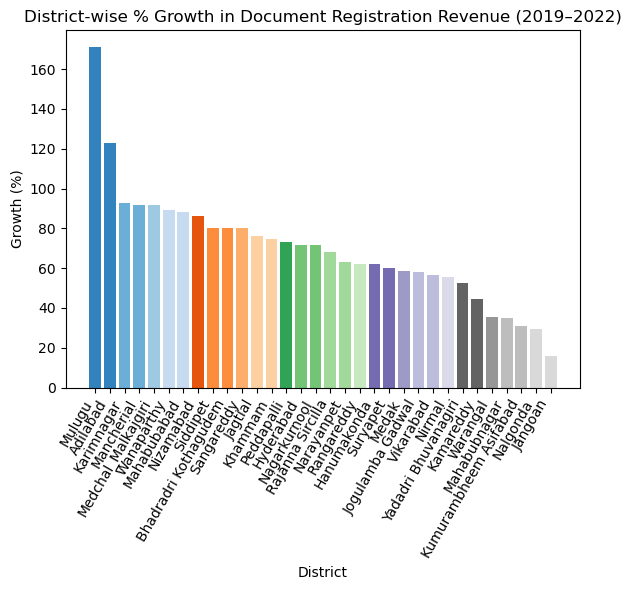

In [82]:
growth_df = growth.reset_index()
growth_df.columns = ['district', 'growth_pct']

# Step 3: Sort for better plot readability
growth_df = growth_df.sort_values('growth_pct', ascending=False)

# Step 4: Define colors (different color for each bar)
colors = plt.cm.tab20c(np.linspace(0, 1, len(growth_df)))

# Step 5: Plot
plt.figure(figsize=(6, 6))
plt.bar(growth_df['district'], growth_df['growth_pct'], color=colors)
plt.title('District-wise % Growth in Document Registration Revenue (2019–2022)')
plt.xlabel('District')
plt.ylabel('Growth (%)')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()


In [81]:
growth_df

,district,growth_pct
16,Mulugu,170.937720
0,Adilabad,122.841346
8,Karimnagar,92.745530
13,Mancherial,91.749143
15,Medchal_Malkajgiri,91.684370
29,Wanaparthy,89.053237
11,Mahabubabad,88.103549
21,Nizamabad,86.326437
26,Siddipet,80.412957
1,Bhadradri Kothagudem,80.124915


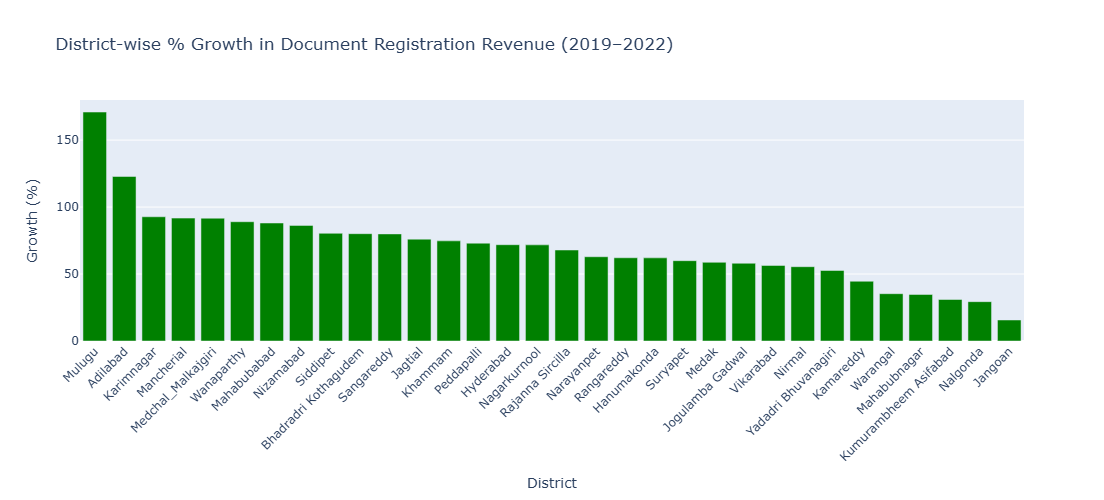

In [83]:
growth_df['color'] = growth_df['growth_pct'].apply(lambda x: 'green' if x >= 0 else 'red')

# Create Plotly bar chart
fig = px.bar(
    growth_df,
    x='district',
    y='growth_pct',
    color='color',
    color_discrete_map={'green': 'green', 'red': 'red'},
    title='District-wise % Growth in Document Registration Revenue (2019–2022)',
    labels={'growth_pct': 'Growth (%)', 'district': 'District'},
)

# Rotate x-axis labels
fig.update_layout(
    xaxis_tickangle=-45,
    showlegend=False,
    height=500,
    width=700
)

fig.show()

Question - 2 

How does the revenue generated from document registration compare 
to the revenue generated from e-stamp challans across districts? List 
down the top 5 districts where e-stamps revenue contributes 
significantly more to the revenue than the documents in FY 2022?

In [172]:
stamp_df_2022 = stamp_df_merge[stamp_df_merge["fiscal_year"] == 2022].copy()
stamp_df_2022 = stamp_df_2022[stamp_df_2022["estamps_challans_rev"] > stamp_df_2022["documents_registered_rev"]].copy()
stamp_df_2022["revenue_diff"] = (stamp_df_2022["estamps_challans_rev"] - stamp_df_2022["documents_registered_rev"])
district_diff = (stamp_df_2022.groupby("district")["revenue_diff"].sum().sort_values(ascending=False))
top_5_districts = district_diff.head(10).reset_index()
print(top_5_districts)


              district  revenue_diff
0           Rangareddy     973850422
1           Sangareddy     265472381
2   Medchal_Malkajgiri     190960639
3            Hyderabad     180617574
4  Yadadri Bhuvanagiri      78427010
5          Hanumakonda      73299434
6              Khammam      56118347
7            Vikarabad      43262093
8           Narayanpet      39730073
9             Suryapet      32342702


In [173]:
top_5_districts

,district,revenue_diff
0,Rangareddy,973850422
1,Sangareddy,265472381
2,Medchal_Malkajgiri,190960639
3,Hyderabad,180617574
4,Yadadri Bhuvanagiri,78427010
5,Hanumakonda,73299434
6,Khammam,56118347
7,Vikarabad,43262093
8,Narayanpet,39730073
9,Suryapet,32342702


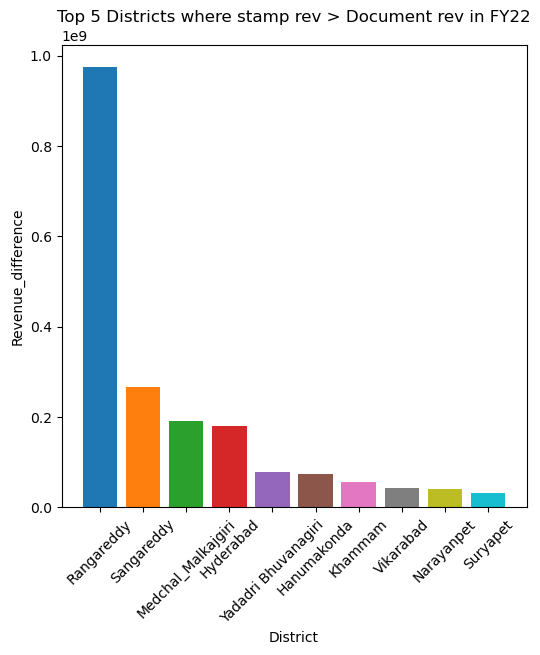

In [174]:
colors = plt.cm.tab10(np.linspace(0, 1, len(top_5_districts)))
plt.figure(figsize=(6, 6))
plt.bar(top_5_districts['district'], top_5_districts['revenue_diff'], color=colors)
plt.title('Top 5 Districts where stamp rev > Document rev in FY22')
plt.xlabel('District')
plt.ylabel('Revenue_difference')
plt.xticks(rotation=45)
plt.show()

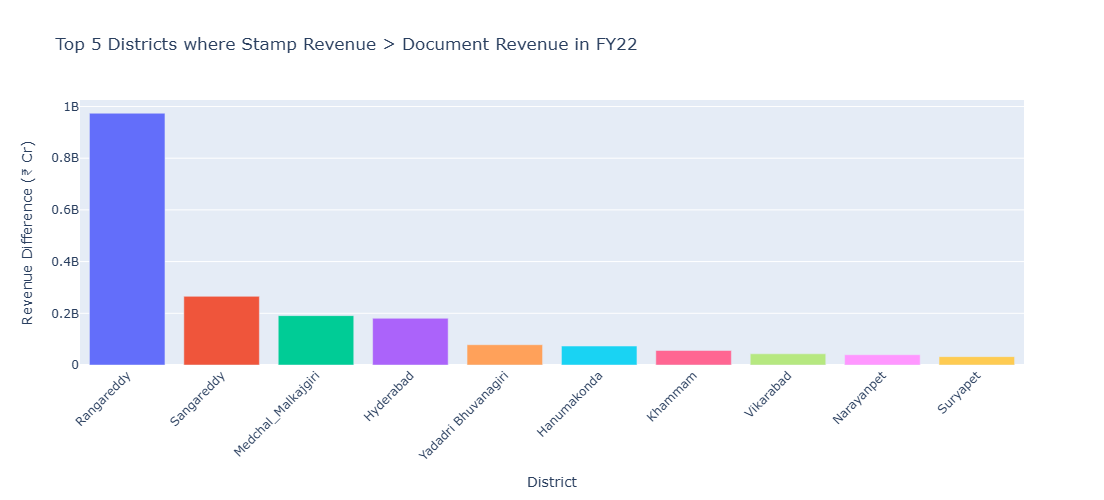

In [175]:
fig = px.bar(
    top_5_districts,
    x='district',
    y='revenue_diff',
    color='district',  # Automatically assigns unique colors
    title='Top 5 Districts where Stamp Revenue > Document Revenue in FY22',
    labels={'district': 'District', 'revenue_diff': 'Revenue Difference (₹ Cr)'}
)

# Customize layout
fig.update_layout(
    xaxis_tickangle=-45,
    showlegend=False,
    height=500,
    width=700
)

fig.show()

In [59]:
stamp_df_merge[stamp_df_merge['fiscal_year']==2019]

,dist_code,month,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev,Mmm,quarter,fiscal_year,district
0,14_1,2019-04-01,4533,59236363,0,0,Apr,Q1,2019,Mahabubnagar
1,17_3,2019-04-01,4151,41508762,0,0,Apr,Q1,2019,Siddipet
2,20_3,2019-04-01,2116,23674170,0,0,Apr,Q1,2019,Rajanna Sircilla
3,21_5,2019-04-01,1089,15915285,0,0,Apr,Q1,2019,Mahabubabad
4,23_1,2019-04-01,6133,82593256,0,0,Apr,Q1,2019,Nalgonda
...,...,...,...,...,...,...,...,...,...,...
379,21_1,2020-03-01,4506,116917458,0,0,Mar,Q4,2019,Hanumakonda
380,21_6,2020-03-01,596,6225967,0,0,Mar,Q4,2019,Mulugu
381,15_3,2020-03-01,1988,21851696,0,0,Mar,Q4,2019,Vikarabad
382,19_2,2020-03-01,1591,16975713,0,0,Mar,Q4,2019,Nirmal


Question-3 


Is there any alteration of e-Stamp challan count and document 
registration count pattern since the implementation of e-Stamp 
challan? If so, what suggestions would you propose to the 
government? 

In [60]:
before_df=stamp_df_merge[stamp_df_merge['fiscal_year']==2019]

In [61]:
after_df=stamp_df_merge[stamp_df_merge['fiscal_year']==2022]

In [62]:
before_grouped=before_df.groupby('district')[['documents_registered_cnt','estamps_challans_cnt']].sum()

In [63]:
after_grouped=after_df.groupby('district')[['documents_registered_cnt','estamps_challans_cnt']].sum()

In [64]:
comparison=after_grouped-before_grouped

In [176]:
comparison['document_change_percent'] = (comparison['documents_registered_cnt'] / before_grouped['documents_registered_cnt']) * 100
comparison['estamp_change_percent'] = (comparison['estamps_challans_cnt'] / before_grouped['estamps_challans_cnt']) * 100

In [178]:
comparison.head()

,documents_registered_cnt,estamps_challans_cnt,estamp_change_percent,document_change_percent
district,,,,
Adilabad,-1440,11559,inf,-11.472275
Bhadradri Kothagudem,-257,7346,inf,-3.432158
Hanumakonda,-12422,52167,inf,-20.448410
Hyderabad,416,68399,inf,0.663487
Jagtial,-8829,20368,inf,-30.626474


In [162]:
from IPython.display import Markdown as md 

md("""Yes, there is a clear alteration in the pattern of e-Stamp challan and document registration counts after the implementation of the e-Stamp system.

For example:
**Hanumakonda** saw a 52,167 increase in e-Stamp challans while document registrations fell by over 12,000 (−20.45%).

**Jagtial** shows a 30% drop in document registrations, but a +20,000 rise in e-Stamps.

In contrast, **Hyderabad** is the only major district where both document registrations and e-Stamp challans increased, showing positive alignment and smoother transition.

This pattern suggests that many citizens adopted the e-Stamp system, but document registrations dropped—possibly due to:

Reduced property transactions during COVID-19

Initial confusion or technical difficulties with new systems,
or
Potential decoupling of challans from formal registrations.""")

Yes, there is a clear alteration in the pattern of e-Stamp challan and document registration counts after the implementation of the e-Stamp system.

For example:
**Hanumakonda** saw a 52,167 increase in e-Stamp challans while document registrations fell by over 12,000 (−20.45%).

**Jagtial** shows a 30% drop in document registrations, but a +20,000 rise in e-Stamps.

In contrast, **Hyderabad** is the only major district where both document registrations and e-Stamp challans increased, showing positive alignment and smoother transition.

This pattern suggests that many citizens adopted the e-Stamp system, but document registrations dropped—possibly due to:

Reduced property transactions during COVID-19

Initial confusion or technical difficulties with new systems,
or
Potential decoupling of challans from formal registrations.

Question-4

Categorize districts into three segments based on their stamp 
registration revenue generation during the fiscal year 2021 to 2022. 


In [67]:
stamp_df_fy2021= stamp_df_merge[stamp_df_merge['fiscal_year']==2021]

In [68]:
stamp_df_fy2021.isnull().sum()

dist_code                   0
month                       0
documents_registered_cnt    0
documents_registered_rev    0
estamps_challans_cnt        0
estamps_challans_rev        0
Mmm                         0
quarter                     0
fiscal_year                 0
district                    0
dtype: int64

In [69]:
revenue_fy2021=stamp_df_fy2021.groupby('district')['estamps_challans_rev'].sum()

In [70]:
revenue_fy2021

district
Adilabad                   332597037
Bhadradri Kothagudem       254379427
Hanumakonda               2112813388
Hyderabad                10893677949
Jagtial                    443715297
Jangoan                    261658853
Jogulamba Gadwal           272076616
Kamareddy                  380467770
Karimnagar                1078423581
Khammam                   1644624288
Kumurambheem Asifabad       58294715
Mahabubabad                264393331
Mahabubnagar               899612434
Mancherial                 444256231
Medak                      482267731
Medchal_Malkajgiri       18747892104
Mulugu                     148856779
Nagarkurnool               378375339
Nalgonda                  1221278894
Narayanpet                 205291521
Nirmal                     293878065
Nizamabad                 1165209994
Peddapalli                 508023769
Rajanna Sircilla           294316478
Rangareddy               32332939769
Sangareddy                6522436259
Siddipet                   74

In [71]:
# Reset index to make it a proper DataFrame
revenue_fy2021 = revenue_fy2021.reset_index()

# Use qcut to categorize into 3 revenue segments
revenue_fy2021['revenue_segment'] = pd.qcut(
    revenue_fy2021['estamps_challans_rev'], 
    q=3, 
    labels=['Low', 'Medium', 'High']
)


In [72]:
print(revenue_fy2021[['district', 'estamps_challans_rev', 'revenue_segment']])

                 district  estamps_challans_rev revenue_segment
0                Adilabad             332597037          Medium
1    Bhadradri Kothagudem             254379427             Low
2             Hanumakonda            2112813388            High
3               Hyderabad           10893677949            High
4                 Jagtial             443715297          Medium
5                 Jangoan             261658853             Low
6        Jogulamba Gadwal             272076616             Low
7               Kamareddy             380467770          Medium
8              Karimnagar            1078423581            High
9                 Khammam            1644624288            High
10  Kumurambheem Asifabad              58294715             Low
11            Mahabubabad             264393331             Low
12           Mahabubnagar             899612434            High
13             Mancherial             444256231          Medium
14                  Medak             48

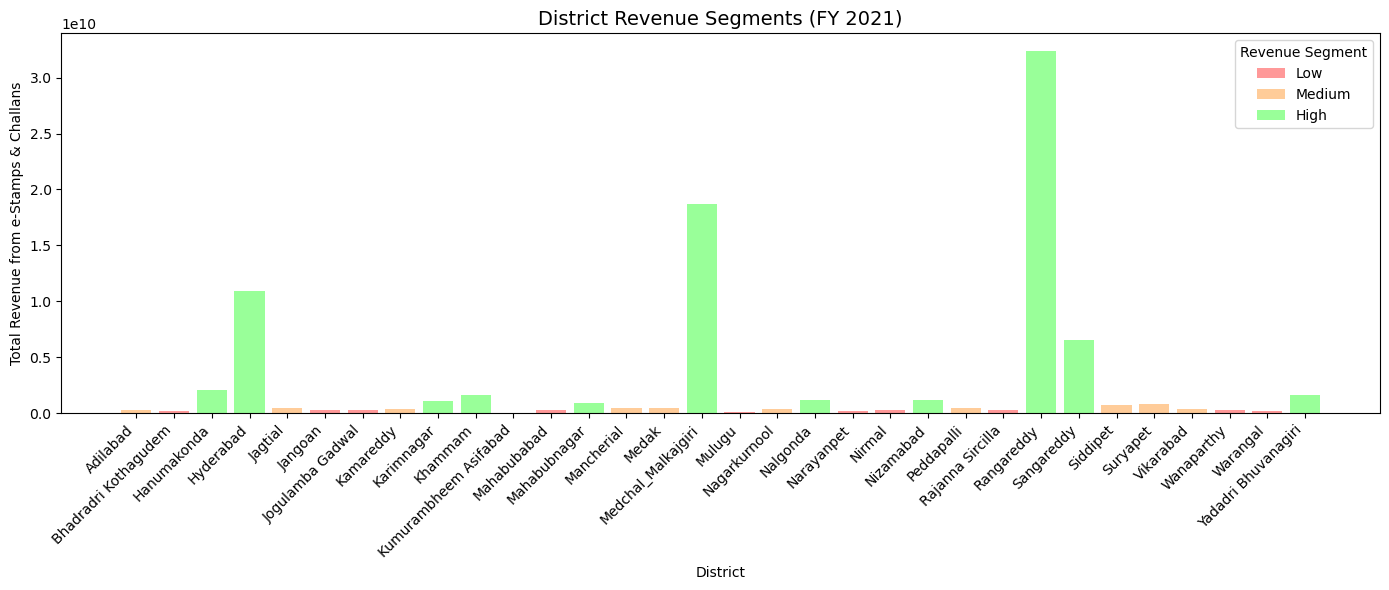

In [87]:
segment_colors = {
    'Low': '#FF9999',      # light red
    'Medium': '#FFCC99',   # light orange
    'High': '#99FF99'      # light green
}

# Map the colors to each row
revenue_fy2021['color'] = revenue_fy2021['revenue_segment'].map(segment_colors)

# Create the barplot
plt.figure(figsize=(14, 6))
bars = plt.bar(
    revenue_fy2021['district'],
    revenue_fy2021['estamps_challans_rev'],
    color=revenue_fy2021['color']
)

# Add legend manually
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#FF9999', label='Low'),
    Patch(facecolor='#FFCC99', label='Medium'),
    Patch(facecolor='#99FF99', label='High')
]
plt.legend(handles=legend_elements, title='Revenue Segment')

# Labels and title
plt.title('District Revenue Segments (FY 2021)', fontsize=14)
plt.xlabel('District')
plt.ylabel('Total Revenue from e-Stamps & Challans')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

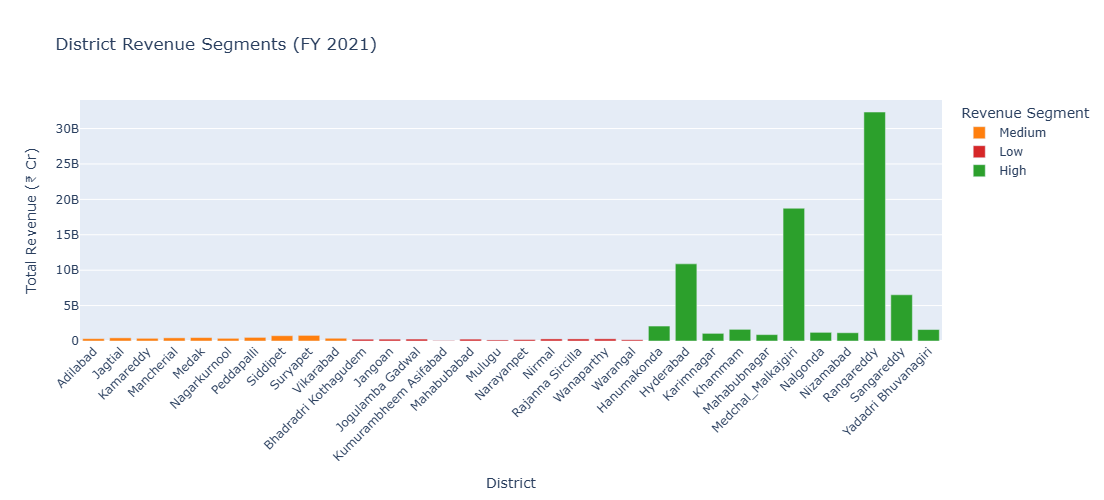

In [88]:
segment_colors = {
    'Low': '#D62728',     # dark red
    'Medium': '#FF7F0E',  # orange
    'High': '#2CA02C'     # dark green
}

# Add color column
revenue_fy2021['color'] = revenue_fy2021['revenue_segment'].map(segment_colors)

# Plotly bar chart
fig = px.bar(
    revenue_fy2021,
    x='district',
    y='estamps_challans_rev',
    color='revenue_segment',
    color_discrete_map=segment_colors,
    labels={
        'district': 'District',
        'estamps_challans_rev': 'Total Revenue (₹ Cr)',
        'revenue_segment': 'Revenue Segment'
    },
    title='District Revenue Segments (FY 2021)'
)

# Update layout for clarity
fig.update_layout(
    xaxis_tickangle=-45,
    height=500,
    width=900,
    legend_title='Revenue Segment'
)

fig.show()

# Insight Generation from transport_data

Question-1 

Investigate whether there is any correlation between vehicle sales and 
specific months or seasons in different districts. Are there any months
 r seasons that consistently show higher sale rates, and if yes, wha 
could be the driving factors? 

In [89]:
transport_df_merged

,dist_code,month,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture,...,seatCapacity_4_to_6,seatCapacity_above_6,Brand_new_vehicles,Pre-owned_vehicles,category_Non-Transport,category_Transport,Mmm,quarter,fiscal_year,district
0,15_1,2019-04-01,17910,3011,76,22,15308,4429,0,4,...,4182,717,19542,1477,19856,1163,Apr,Q1,2019,Rangareddy
1,18_2,2019-04-01,3066,306,6,0,2995,142,49,64,...,189,33,3322,56,3203,175,Apr,Q1,2019,Kamareddy
2,20_3,2019-04-01,1577,215,0,0,1546,79,29,21,...,104,5,1751,41,1648,144,Apr,Q1,2019,Rajanna Sircilla
3,21_3,2019-04-01,1961,281,2,0,1939,72,72,48,...,146,16,2209,35,2075,169,Apr,Q1,2019,Jangoan
4,21_7,2019-04-01,1552,309,0,0,1512,76,69,109,...,145,20,1820,41,1701,160,Apr,Q1,2019,Jayashankar Bhupalpally
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,16_1,2023-03-01,24112,2169,2606,1848,21501,5792,1684,0,...,7139,1093,26285,4450,27421,3314,Mar,Q4,2022,Hyderabad
1436,14_4,2023-03-01,996,286,20,67,884,137,75,106,...,219,27,1300,69,1129,240,Mar,Q4,2022,Wanaparthy
1437,20_3,2023-03-01,886,183,71,12,828,146,17,54,...,167,19,1060,92,1030,122,Mar,Q4,2022,Rajanna Sircilla
1438,23_3,2023-03-01,1659,472,39,97,1413,289,95,182,...,391,47,2107,160,1889,378,Mar,Q4,2022,Yadadri Bhuvanagiri


In [90]:
transport_df_merged.dtypes
    

dist_code                            object
month                        datetime64[ns]
fuel_type_petrol                      int64
fuel_type_diesel                      int64
fuel_type_electric                    int64
fuel_type_others                      int64
vehicleClass_MotorCycle               int64
vehicleClass_MotorCar                 int64
vehicleClass_AutoRickshaw             int64
vehicleClass_Agriculture              int64
vehicleClass_others                   int64
seatCapacity_1_to_3                   int64
seatCapacity_4_to_6                   int64
seatCapacity_above_6                  int64
Brand_new_vehicles                    int64
Pre-owned_vehicles                    int64
category_Non-Transport                int64
category_Transport                    int64
Mmm                                  object
quarter                              object
fiscal_year                           int64
district                             object
dtype: object

In [91]:
transport_df_merged['fiscal_year']=transport_df_merged['fiscal_year'].astype('object')

In [92]:
transport_df_merged.dtypes

dist_code                            object
month                        datetime64[ns]
fuel_type_petrol                      int64
fuel_type_diesel                      int64
fuel_type_electric                    int64
fuel_type_others                      int64
vehicleClass_MotorCycle               int64
vehicleClass_MotorCar                 int64
vehicleClass_AutoRickshaw             int64
vehicleClass_Agriculture              int64
vehicleClass_others                   int64
seatCapacity_1_to_3                   int64
seatCapacity_4_to_6                   int64
seatCapacity_above_6                  int64
Brand_new_vehicles                    int64
Pre-owned_vehicles                    int64
category_Non-Transport                int64
category_Transport                    int64
Mmm                                  object
quarter                              object
fiscal_year                          object
district                             object
dtype: object

In [93]:
transport_df_merged['total_sales'] = transport_df_merged.select_dtypes(include='number').sum(axis=1)


In [94]:
transport_df_merged

,dist_code,month,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture,...,seatCapacity_above_6,Brand_new_vehicles,Pre-owned_vehicles,category_Non-Transport,category_Transport,Mmm,quarter,fiscal_year,district,total_sales
0,15_1,2019-04-01,17910,3011,76,22,15308,4429,0,4,...,717,19542,1477,19856,1163,Apr,Q1,2019,Rangareddy,105085
1,18_2,2019-04-01,3066,306,6,0,2995,142,49,64,...,33,3322,56,3203,175,Apr,Q1,2019,Kamareddy,16890
2,20_3,2019-04-01,1577,215,0,0,1546,79,29,21,...,5,1751,41,1648,144,Apr,Q1,2019,Rajanna Sircilla,8960
3,21_3,2019-04-01,1961,281,2,0,1939,72,72,48,...,16,2209,35,2075,169,Apr,Q1,2019,Jangoan,11220
4,21_7,2019-04-01,1552,309,0,0,1512,76,69,109,...,20,1820,41,1701,160,Apr,Q1,2019,Jayashankar Bhupalpally,9305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,16_1,2023-03-01,24112,2169,2606,1848,21501,5792,1684,0,...,1093,26285,4450,27421,3314,Mar,Q4,2022,Hyderabad,153665
1436,14_4,2023-03-01,996,286,20,67,884,137,75,106,...,27,1300,69,1129,240,Mar,Q4,2022,Wanaparthy,6845
1437,20_3,2023-03-01,886,183,71,12,828,146,17,54,...,19,1060,92,1030,122,Mar,Q4,2022,Rajanna Sircilla,5760
1438,23_3,2023-03-01,1659,472,39,97,1413,289,95,182,...,47,2107,160,1889,378,Mar,Q4,2022,Yadadri Bhuvanagiri,11335


In [95]:
transport_season=(transport_df_merged.groupby(['Mmm','district'])['total_sales'].sum().reset_index())

In [96]:
transport_season

,Mmm,district,total_sales
0,Apr,Adilabad,27680
1,Apr,Bhadradri Kothagudem,52123
2,Apr,Hyderabad,371592
3,Apr,Jagtial,36718
4,Apr,Jangoan,24045
...,...,...,...
355,Sep,Suryapet,62793
356,Sep,Vikarabad,63290
357,Sep,Wanaparthy,25675
358,Sep,Warangal,79516


In [97]:
# Pivot for heatmap or easier line plotting
pivot_sales = transport_season.pivot(index='Mmm', columns='district', values='total_sales')

# Optional: reorder months if needed
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
pivot_sales = pivot_sales.reindex(month_order)


In [98]:
pivot_sales

district,Adilabad,Bhadradri Kothagudem,Hyderabad,Jagtial,Jangoan,Jayashankar Bhupalpally,Jogulamba Gadwal,Kamareddy,Karimnagar,Khammam,...,Peddapalli,Rajanna Sircilla,Rangareddy,Sangareddy,Siddipet,Suryapet,Vikarabad,Wanaparthy,Warangal,Yadadri Bhuvanagiri
Mmm,,,,,,,,,,,,,,,,,,,,,
Jan,32460,73663,475436,47980,32723,35640,33360,50515,64410,105936,...,38430,29880,390268,117027,59661,76516,70113,28670,94420,52436
Feb,37373,62115,456650,52050,28269,29980,28500,55025,57521,88190,...,37300,30575,367691,117598,57158,63845,71833,27075,79107,46383
Mar,40190,69933,543977,49300,30376,37788,35529,55225,63053,97129,...,37438,28705,433957,128615,59733,68855,79948,30930,82887,51277
Apr,27680,52123,371592,36718,24045,28110,26175,40575,52620,76041,...,28218,21230,294695,90944,43700,48363,62050,23685,67946,36495
May,29275,57347,340888,42463,26508,30145,27379,47335,58019,80067,...,31023,23415,276422,92850,49005,61528,64570,24945,78349,38585
Jun,30655,70421,489414,67396,37355,46203,35811,62948,78844,107694,...,48195,34115,399914,121215,75981,82942,82030,36380,110603,54962
Jul,31210,59135,476754,58823,31835,39779,37625,50648,63653,91209,...,37040,27279,383791,109959,60675,72294,72093,32815,98743,51038
Aug,29590,50566,526102,53905,29855,31265,33555,50880,72067,85875,...,41945,32865,413498,114411,59906,60278,69775,30590,97271,50863
Sep,24560,48128,465188,50298,30451,31336,27615,47835,63527,86440,...,33650,29070,372596,107961,55445,62793,63290,25675,79516,46115


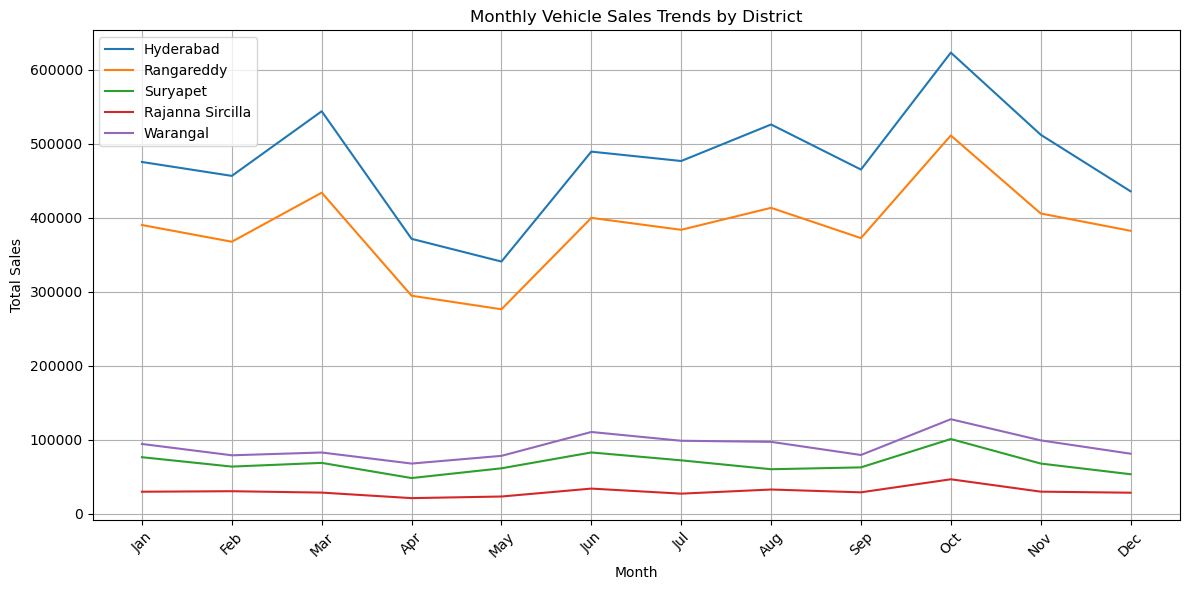

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sample_districts = ['Hyderabad', 'Rangareddy', 'Suryapet','Rajanna Sircilla','Warangal']  # Or pick top 3 by total sales
for district in sample_districts:
    plt.plot(pivot_sales.index, pivot_sales[district], label=district)

plt.title('Monthly Vehicle Sales Trends by District')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


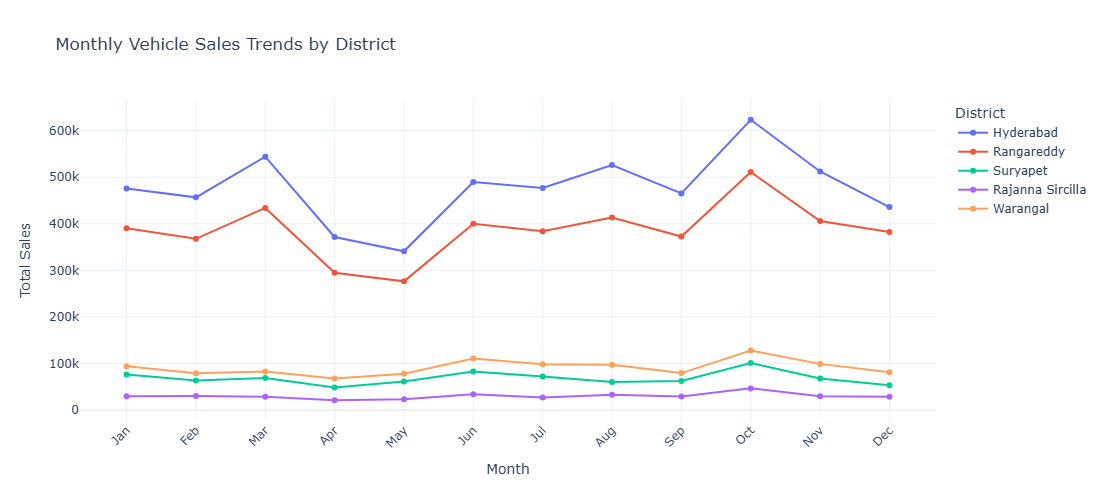

In [100]:
import plotly.graph_objects as go

# Define sample districts
sample_districts = ['Hyderabad', 'Rangareddy', 'Suryapet', 'Rajanna Sircilla', 'Warangal']

# Create a line chart
fig = go.Figure()

for district in sample_districts:
    fig.add_trace(go.Scatter(
        x=pivot_sales.index,
        y=pivot_sales[district],
        mode='lines+markers',
        name=district
    ))

# Customize layout
fig.update_layout(
    title='Monthly Vehicle Sales Trends by District',
    xaxis_title='Month',
    yaxis_title='Total Sales',
    xaxis_tickangle=-45,
    height=500,
    width=950,
    legend_title='District',
    template='plotly_white'
)

fig.show()

In [101]:
print(pivot_sales.columns.tolist())


['Adilabad', 'Bhadradri Kothagudem', 'Hyderabad', 'Jagtial', 'Jangoan', 'Jayashankar Bhupalpally', 'Jogulamba Gadwal', 'Kamareddy', 'Karimnagar', 'Khammam', 'Kumurambheem Asifabad', 'Mahabubabad', 'Mahabubnagar', 'Mancherial', 'Medak', 'Medchal_Malkajgiri', 'Nagarkurnool', 'Nalgonda', 'Nirmal', 'Nizamabad', 'Peddapalli', 'Rajanna Sircilla', 'Rangareddy', 'Sangareddy', 'Siddipet', 'Suryapet', 'Vikarabad', 'Wanaparthy', 'Warangal', 'Yadadri Bhuvanagiri']


Question-2

How does the distribution of vehicles vary by vehicle class (MotorCycle, MotorCar, AutoRickshaw, Agriculture) across different districts? Are there any districts with a predominant preference for a specific vehicle class? Consider FY 2022 for analysis.

In [102]:
transport_2022=transport_df_merged[transport_df_merged['fiscal_year']==2022].copy()

In [103]:
transport_2022

,dist_code,month,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture,...,seatCapacity_above_6,Brand_new_vehicles,Pre-owned_vehicles,category_Non-Transport,category_Transport,Mmm,quarter,fiscal_year,district,total_sales
1080,14_4,2022-04-01,936,312,16,2,872,106,10,50,...,14,1230,36,1038,228,Apr,Q1,2022,Wanaparthy,6330
1081,21_7,2022-04-01,1291,211,34,2,1211,127,16,129,...,18,1481,57,1469,69,Apr,Q1,2022,Jayashankar Bhupalpally,7690
1082,14_1,2022-04-01,2185,433,55,8,2004,283,26,74,...,39,2538,143,2375,306,Apr,Q1,2022,Mahabubnagar,13405
1083,17_3,2022-04-01,2034,521,44,38,1834,311,22,213,...,52,2518,119,2363,274,Apr,Q1,2022,Siddipet,13185
1084,14_3,2022-04-01,1489,383,24,4,1356,184,11,88,...,25,1836,64,1634,266,Apr,Q1,2022,Nagarkurnool,9500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,16_1,2023-03-01,24112,2169,2606,1848,21501,5792,1684,0,...,1093,26285,4450,27421,3314,Mar,Q4,2022,Hyderabad,153665
1436,14_4,2023-03-01,996,286,20,67,884,137,75,106,...,27,1300,69,1129,240,Mar,Q4,2022,Wanaparthy,6845
1437,20_3,2023-03-01,886,183,71,12,828,146,17,54,...,19,1060,92,1030,122,Mar,Q4,2022,Rajanna Sircilla,5760
1438,23_3,2023-03-01,1659,472,39,97,1413,289,95,182,...,47,2107,160,1889,378,Mar,Q4,2022,Yadadri Bhuvanagiri,11335


In [104]:
transport_2022_vehicleClass=transport_2022.groupby('district')[['vehicleClass_MotorCycle','vehicleClass_MotorCar','vehicleClass_AutoRickshaw','vehicleClass_Agriculture']].sum().copy()

In [105]:
transport_2022_vehicleClass

,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture
district,,,,
Adilabad,10410,1416,368,467
Bhadradri Kothagudem,17022,3157,1388,2013
Hyderabad,206819,51447,8397,20
Jagtial,13639,2055,272,858
Jangoan,8617,1177,397,1225
Jayashankar Bhupalpally,9225,1343,218,1928
Jogulamba Gadwal,10300,899,116,868
Kamareddy,15184,2153,379,748
Karimnagar,19411,4818,1042,999


Insights

--> Motorcycles are most prefered in alomost all districts

--> Second most prefered can be motorcar or agriculuture depends on preference as for some districts which rely on agriculuture like Jangoan and Jayashankar Bhupalpally and for almost remaining districts motorcar is second most prefered

Question - 3 

List down the top 3 and bottom 3 districts that have shown the highest 
and lowest vehicle sales growth during FY 2022 compared to FY
2021? (Consider and compare categories: Petrol, Diesel and Electric) 

In [106]:
transport_2022_fuel=transport_2022.groupby('district')[['fuel_type_petrol','fuel_type_diesel','fuel_type_electric']].sum()

In [107]:
transport_2022_fuel

,fuel_type_petrol,fuel_type_diesel,fuel_type_electric
district,,,
Adilabad,11212,2523,333
Bhadradri Kothagudem,19331,5712,290
Hyderabad,231166,20019,20026
Jagtial,14836,2261,642
Jangoan,9520,2461,179
Jayashankar Bhupalpally,10274,3169,227
Jogulamba Gadwal,10911,2336,84
Kamareddy,17043,3225,273
Karimnagar,24574,10644,1132


In [108]:
transport_2021=transport_df_merged[transport_df_merged['fiscal_year']==2021]

In [109]:
transport_2021

,dist_code,month,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture,...,seatCapacity_above_6,Brand_new_vehicles,Pre-owned_vehicles,category_Non-Transport,category_Transport,Mmm,quarter,fiscal_year,district,total_sales
720,21_3,2021-04-01,990,285,0,2,856,142,8,191,...,12,1233,44,1198,79,Apr,Q1,2021,Jangoan,6385
721,21_7,2021-04-01,1750,360,10,0,1578,191,20,241,...,21,2059,61,2016,104,Apr,Q1,2021,Jayashankar Bhupalpally,10600
722,14_1,2021-04-01,3301,661,19,2,2996,380,44,253,...,57,3838,145,3633,350,Apr,Q1,2021,Mahabubnagar,19915
723,17_3,2021-04-01,1893,474,6,30,1698,255,30,297,...,35,2331,72,2261,142,Apr,Q1,2021,Siddipet,12015
724,14_3,2021-04-01,1718,539,2,0,1582,170,24,241,...,24,2175,84,1997,262,Apr,Q1,2021,Nagarkurnool,11295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,23_2,2022-03-01,2267,706,34,24,2041,345,28,209,...,97,2907,124,2617,414,Mar,Q4,2021,Suryapet,15155
1076,23_1,2022-03-01,3127,736,73,17,2803,526,10,197,...,108,3752,201,3549,404,Mar,Q4,2021,Nalgonda,19765
1077,18_2,2022-03-01,1949,193,44,8,1801,224,32,39,...,32,2089,105,2068,126,Mar,Q4,2021,Kamareddy,10970
1078,15_1,2022-03-01,17657,2930,1142,268,13100,7383,2,25,...,1111,19417,2580,20636,1361,Mar,Q4,2021,Rangareddy,109985


In [110]:
transport_2021_fuel=transport_2021.groupby('district')[['fuel_type_petrol','fuel_type_diesel','fuel_type_electric']].sum()

In [111]:
transport_2021_fuel

,fuel_type_petrol,fuel_type_diesel,fuel_type_electric
district,,,
Adilabad,16592,2267,277
Bhadradri Kothagudem,27650,5739,76
Hyderabad,228817,21195,8929
Jagtial,24945,2872,409
Jangoan,13843,3155,73
Jayashankar Bhupalpally,15788,3904,111
Jogulamba Gadwal,14239,2309,52
Kamareddy,26055,3001,183
Karimnagar,29074,5034,704


In [112]:
transport_2022_fuel['petrol_growth'] = ((transport_2022_fuel['fuel_type_petrol'] - transport_2021_fuel['fuel_type_petrol']) / transport_2021_fuel['fuel_type_petrol']) * 100
transport_2022_fuel['diesel_growth'] = ((transport_2022_fuel['fuel_type_diesel'] - transport_2021_fuel['fuel_type_diesel']) / transport_2021_fuel['fuel_type_diesel']) * 100
transport_2022_fuel['electric_growth'] =((transport_2022_fuel['fuel_type_electric'] - transport_2021_fuel['fuel_type_electric']) / transport_2021_fuel['fuel_type_electric']) * 100


In [113]:
transport_2022_fuel

,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,petrol_growth,diesel_growth,electric_growth
district,,,,,,
Adilabad,11212,2523,333,-32.425265,11.292457,20.216606
Bhadradri Kothagudem,19331,5712,290,-30.086799,-0.470465,281.578947
Hyderabad,231166,20019,20026,1.026585,-5.548478,124.280435
Jagtial,14836,2261,642,-40.525155,-21.274373,56.968215
Jangoan,9520,2461,179,-31.228780,-21.996830,145.205479
Jayashankar Bhupalpally,10274,3169,227,-34.925260,-18.826844,104.504505
Jogulamba Gadwal,10911,2336,84,-23.372428,1.169337,61.538462
Kamareddy,17043,3225,273,-34.588371,7.464179,49.180328
Karimnagar,24574,10644,1132,-15.477746,111.442193,60.795455


In [114]:
transport_2022_fuel['total_growth'] = transport_2022_fuel[['petrol_growth', 'diesel_growth', 'electric_growth']].mean(axis=1)


In [115]:
transport_2022_fuel

,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,petrol_growth,diesel_growth,electric_growth,total_growth
district,,,,,,,
Adilabad,11212,2523,333,-32.425265,11.292457,20.216606,-0.305401
Bhadradri Kothagudem,19331,5712,290,-30.086799,-0.470465,281.578947,83.673894
Hyderabad,231166,20019,20026,1.026585,-5.548478,124.280435,39.919514
Jagtial,14836,2261,642,-40.525155,-21.274373,56.968215,-1.610438
Jangoan,9520,2461,179,-31.228780,-21.996830,145.205479,30.659956
Jayashankar Bhupalpally,10274,3169,227,-34.925260,-18.826844,104.504505,16.917467
Jogulamba Gadwal,10911,2336,84,-23.372428,1.169337,61.538462,13.111790
Kamareddy,17043,3225,273,-34.588371,7.464179,49.180328,7.352045
Karimnagar,24574,10644,1132,-15.477746,111.442193,60.795455,52.253300


In [116]:
top3 = transport_2022_fuel.sort_values(by='total_growth', ascending=False).head(3).reset_index()
bottom3 = transport_2022_fuel.sort_values(by='total_growth', ascending=True).head(3).reset_index()

print("Top 3 districts by vehicle sales growth:")
print(top3[['district', 'total_growth']])

print("\nBottom 3 districts by vehicle sales growth:")
print(bottom3[['district', 'total_growth']])

Top 3 districts by vehicle sales growth:
               district  total_growth
0               Khammam    127.729531
1  Bhadradri Kothagudem     83.673894
2              Suryapet     70.956355

Bottom 3 districts by vehicle sales growth:
           district  total_growth
0          Warangal    -12.819804
1      Mahabubnagar    -12.141330
2  Rajanna Sircilla    -11.943232


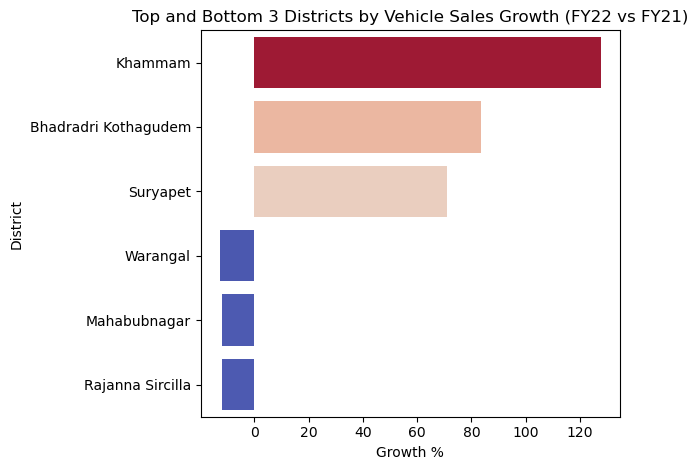

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

top_bottom = pd.concat([top3, bottom3])
sns.barplot(
    data=top_bottom,
    x='total_growth',
    y='district',
    hue='total_growth',              # Add this line
    palette='coolwarm',
    dodge=False,                     # Keep bars in place
    legend=False                     # Hide the legend (optional)
)
plt.title('Top and Bottom 3 Districts by Vehicle Sales Growth (FY22 vs FY21)')
plt.xlabel('Growth %')
plt.ylabel('District')
plt.tight_layout()
plt.show()


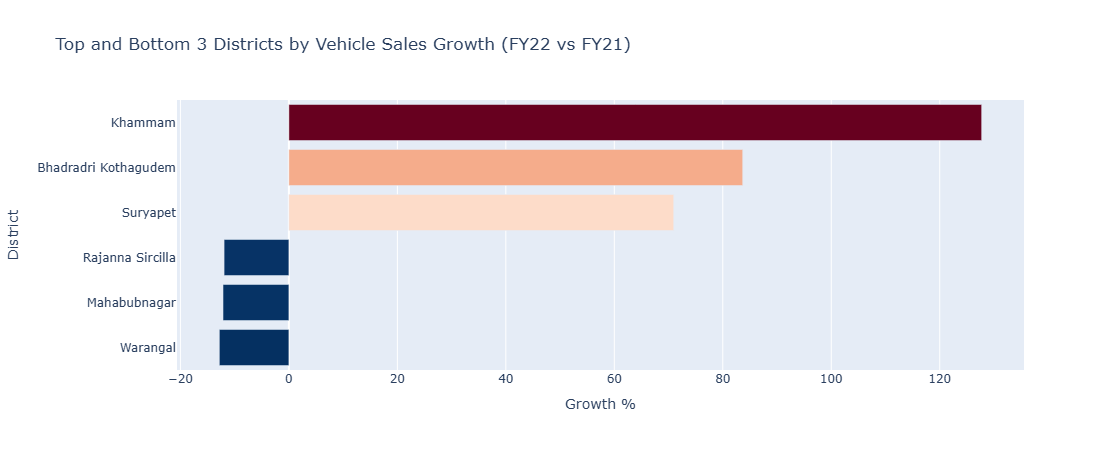

In [118]:
op_bottom = pd.concat([top3, bottom3])

# Sort by growth for cleaner layout
top_bottom = top_bottom.sort_values('total_growth')

# Plotly bar chart
fig = px.bar(
    top_bottom,
    x='total_growth',
    y='district',
    color='total_growth',
    color_continuous_scale='RdBu_r',  # Red to Blue reversed (matches coolwarm)
    orientation='h',
    title='Top and Bottom 3 Districts by Vehicle Sales Growth (FY22 vs FY21)',
    labels={'total_growth': 'Growth %', 'district': 'District'}
)

# Update layout for better readability
fig.update_layout(
    xaxis_title='Growth %',
    yaxis_title='District',
    height=450,
    coloraxis_showscale=False  # Hide color scale if you prefer
)

fig.show()

## Insights from I-Pass Dataset 

Question-1

List down the top 5 sectors that have witnessed the most significant 
investments in FY 2022. 

In [119]:
ipass_df_merged

,dist_code,month,sector,investment in cr,number_of_employees,Mmm,quarter,fiscal_year,district
0,14_1,2019-04-01,Engineering,2.3200,15,Apr,Q1,2019,Mahabubnagar
1,19_1,2019-04-01,Engineering,0.6250,13,Apr,Q1,2019,Adilabad
2,20_3,2019-04-01,Wood and Leather,0.2000,8,Apr,Q1,2019,Rajanna Sircilla
3,20_3,2019-04-01,Textiles,0.2675,27,Apr,Q1,2019,Rajanna Sircilla
4,21_5,2019-04-01,Electrical and Electronic Products,0.1200,5,Apr,Q1,2019,Mahabubabad
...,...,...,...,...,...,...,...,...,...
5748,20_4,2023-03-01,Engineering,0.1200,3,Mar,Q4,2022,Peddapalli
5749,20_4,2023-03-01,Food Processing,0.7509,9,Mar,Q4,2022,Peddapalli
5750,20_4,2023-03-01,Others,7.7500,10,Mar,Q4,2022,Peddapalli
5751,21_1,2023-03-01,Food Processing,0.3200,9,Mar,Q4,2022,Hanumakonda


In [120]:
ipass_2022=ipass_df_merged[ipass_df_merged['fiscal_year']==2022]

In [121]:
ipass_2022

,dist_code,month,sector,investment in cr,number_of_employees,Mmm,quarter,fiscal_year,district
4320,15_1,2022-04-01,Engineering,38.2726,171,Apr,Q1,2022,Rangareddy
4321,15_1,2022-04-01,Agro based incl Cold Storages,0.2400,7,Apr,Q1,2022,Rangareddy
4322,22_1,2022-04-01,Beverages,0.0750,2,Apr,Q1,2022,Khammam
4323,22_1,2022-04-01,Agro based incl Cold Storages,0.0800,4,Apr,Q1,2022,Khammam
4324,14_5,2022-04-01,Food Processing,1.5573,25,Apr,Q1,2022,Narayanpet
...,...,...,...,...,...,...,...,...,...
5748,20_4,2023-03-01,Engineering,0.1200,3,Mar,Q4,2022,Peddapalli
5749,20_4,2023-03-01,Food Processing,0.7509,9,Mar,Q4,2022,Peddapalli
5750,20_4,2023-03-01,Others,7.7500,10,Mar,Q4,2022,Peddapalli
5751,21_1,2023-03-01,Food Processing,0.3200,9,Mar,Q4,2022,Hanumakonda


In [122]:
ipass_2022_invest=ipass_2022.groupby('sector')['investment in cr'].sum().sort_values(ascending=False).head().reset_index()

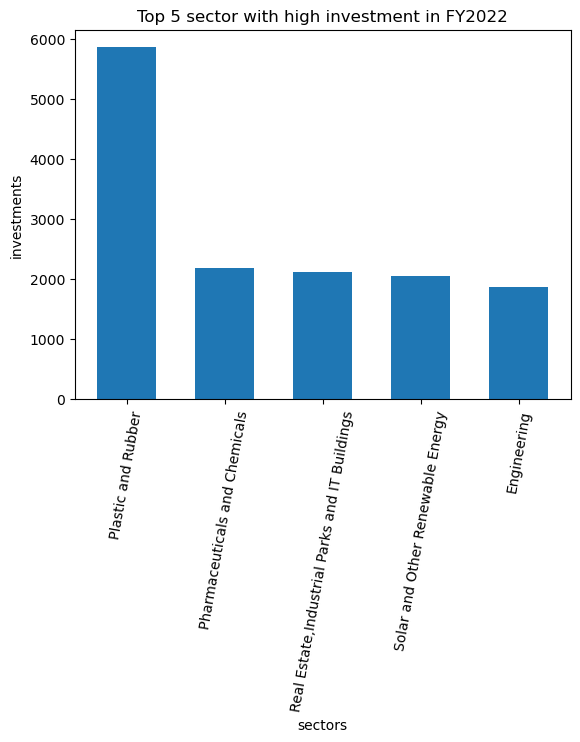

In [123]:
plt.bar(x=ipass_2022_invest['sector'],height=ipass_2022_invest['investment in cr'],width=0.6)
plt.xticks(rotation=80)
plt.title('Top 5 sector with high investment in FY2022')
plt.xlabel('sectors')
plt.ylabel('investments')
plt.show()

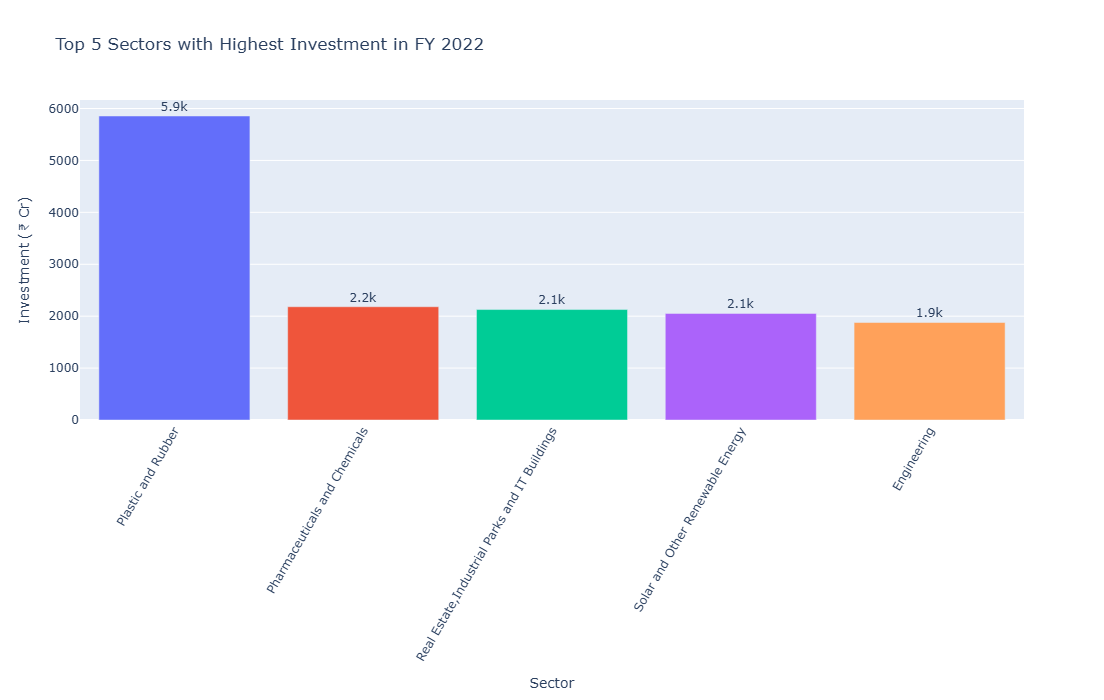

In [139]:
fig = px.bar(
    ipass_2022_invest,
    x='sector',
    y='investment in cr',
    text='investment in cr',
    color='sector',
    title='Top 5 Sectors with Highest Investment in FY 2022',
    labels={'sector': 'Sector', 'investment in cr': 'Investment (₹ Cr)'}
)

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(
    xaxis_tickangle=-60,
    showlegend=False,
    height=700
)

fig.show()

In [163]:
ipass_invest=ipass_df_merged.groupby('sector')['investment in cr'].sum().sort_values(ascending=False).reset_index()

In [164]:
ipass_invest

,sector,investment in cr
0,"Real Estate,Industrial Parks and IT Buildings",29778.1741
1,Pharmaceuticals and Chemicals,15858.0561
2,Plastic and Rubber,9649.7846
3,Solar and Other Renewable Energy,5639.7032
4,"Fertlizers Organic and Inorganic,Pesticides,In...",5418.3977
5,Engineering,5024.6131
6,Food Processing,4115.9122
7,R&D,3520.9069
8,Others,3229.4807
9,Paper and Printing,2946.2394


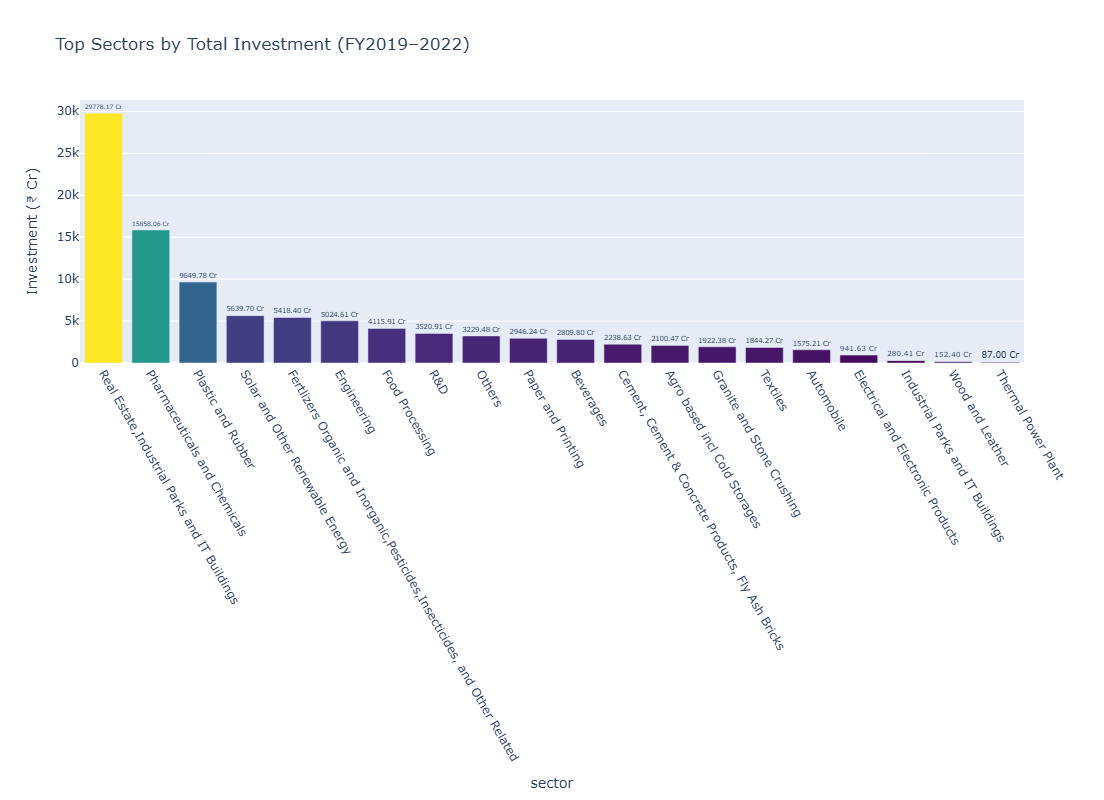

In [170]:
fig = px.bar(
    ipass_invest,
    x='sector',
    y='investment in cr',
    text='investment in cr',
    color='investment in cr',  # color by value instead of sector
    color_continuous_scale='viridis',
    title='Top Sectors by Total Investment (FY2019–2022)',
    labels={'investment in cr': 'Investment (₹ Cr)', 'district': 'District'}
)

fig.update_layout(
    xaxis_tickangle=60,
    height=800,
    coloraxis_showscale=False
)

fig.update_traces(texttemplate='%{text:.2f} Cr', textposition='outside')
fig.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------

Question - 2 

List down the top 3 districts that have attracted the most significant 
sector investments during FY 2019 to 2022? What factors could have
led to the substantial investments in these particular districts?

In [148]:
ipass_complete_investment=ipass_df_merged.groupby('district')['investment in cr'].sum().reset_index().sort_values(by='investment in cr',ascending=False)

In [149]:

ipass_complete_investment

,district,investment in cr
25,Rangareddy,42706.3320
26,Sangareddy,12366.7556
16,Medchal_Malkajgiri,10394.5610
23,Peddapalli,5715.3865
13,Mahabubnagar,4771.8909
32,Yadadri Bhuvanagiri,3499.8803
15,Medak,3224.0205
27,Siddipet,2047.2460
1,Bhadradri Kothagudem,2028.5045
28,Suryapet,2028.4300


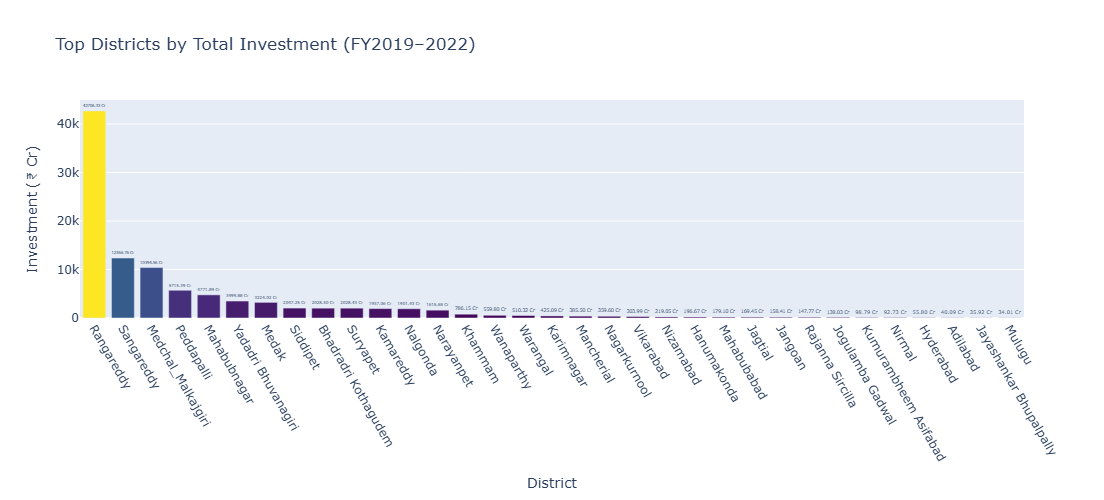

In [154]:
fig = px.bar(
    ipass_complete_investment,
    x='district',
    y='investment in cr',
    text='investment in cr',
    color='investment in cr',  # color by value instead of sector
    color_continuous_scale='viridis',
    title='Top Districts by Total Investment (FY2019–2022)',
    labels={'investment in cr': 'Investment (₹ Cr)', 'district': 'District'}
)

fig.update_layout(
    xaxis_tickangle=60,
    height=500,
    coloraxis_showscale=False
)

fig.update_traces(texttemplate='%{text:.2f} Cr', textposition='outside')
fig.show()

In [156]:
from IPython.display import Markdown as md

md("""
### 🧠 Insight: District-Wise Investment Trends

The bar chart shows that certain districts (like **Rangareddy**,**Sangareddy** or **Medchal**) have attracted disproportionately higher investments.  
This could be due to:

- Proximity to urban hubs and developed infrastructure
- Availability of tech parks, logistics centers, and SEZs
- Government focus on developing Tier-1 and Tier-2 districts under TS-iPASS

This concentration may suggest the need for further policy support in low-investment districts.
""")



### 🧠 Insight: District-Wise Investment Trends

The bar chart shows that certain districts (like **Rangareddy**,**Sangareddy** or **Medchal**) have attracted disproportionately higher investments.  
This could be due to:

- Proximity to urban hubs and developed infrastructure
- Availability of tech parks, logistics centers, and SEZs
- Government focus on developing Tier-1 and Tier-2 districts under TS-iPASS

This concentration may suggest the need for further policy support in low-investment districts.


--> Telegana in particularly Hyderabad has been on the rise from many years in Software,IT,Industrial sectors and has been performing very well which    happens to dominant these sectors which obvisously increases the Real Estate,Industrial Parks and IT Bulidings investment.

---> Telegana has been the pharma capital of the world for sometime now and has been on the rise as well which also delivered crucial breakthrough during COVID vaccine preapration and has been producing vaccines to the world and investment has been on rise to make it world class.


---------------------------------------------------------------------------------------------------------------------------------------------------------

Question-3
 
Is there any relationship between sector investments, vehicles  sales and stamps revenue in the same district between FY 2021  and 2022 

---------------------------------------------------------------------------------------------------------------------------------------------------------

Question - 4

Are there any particular sectors that have shown substantial  growth in multiple districts in FY 2022?

In [127]:
ipass_2022

,dist_code,month,sector,investment in cr,number_of_employees,Mmm,quarter,fiscal_year,district
4320,15_1,2022-04-01,Engineering,38.2726,171,Apr,Q1,2022,Rangareddy
4321,15_1,2022-04-01,Agro based incl Cold Storages,0.2400,7,Apr,Q1,2022,Rangareddy
4322,22_1,2022-04-01,Beverages,0.0750,2,Apr,Q1,2022,Khammam
4323,22_1,2022-04-01,Agro based incl Cold Storages,0.0800,4,Apr,Q1,2022,Khammam
4324,14_5,2022-04-01,Food Processing,1.5573,25,Apr,Q1,2022,Narayanpet
...,...,...,...,...,...,...,...,...,...
5748,20_4,2023-03-01,Engineering,0.1200,3,Mar,Q4,2022,Peddapalli
5749,20_4,2023-03-01,Food Processing,0.7509,9,Mar,Q4,2022,Peddapalli
5750,20_4,2023-03-01,Others,7.7500,10,Mar,Q4,2022,Peddapalli
5751,21_1,2023-03-01,Food Processing,0.3200,9,Mar,Q4,2022,Hanumakonda


In [128]:
sector_district=ipass_2022.groupby(['sector','district'])['investment in cr'].sum().reset_index()

In [129]:
sector_growth=sector_district.groupby('sector')['district'].nunique().reset_index()

In [130]:
sector_growth.columns = ['sector', 'num_districts_with_investment']

In [131]:
sector_growth = sector_growth.sort_values(by='num_districts_with_investment', ascending=False)

In [132]:
sector_growth

,sector,num_districts_with_investment
7,Food Processing,33
3,"Cement, Cement & Concrete Products, Fly Ash Br...",31
10,Others,29
5,Engineering,27
0,Agro based incl Cold Storages,25
2,Beverages,24
8,Granite and Stone Crushing,21
18,Wood and Leather,19
12,Pharmaceuticals and Chemicals,18
13,Plastic and Rubber,18


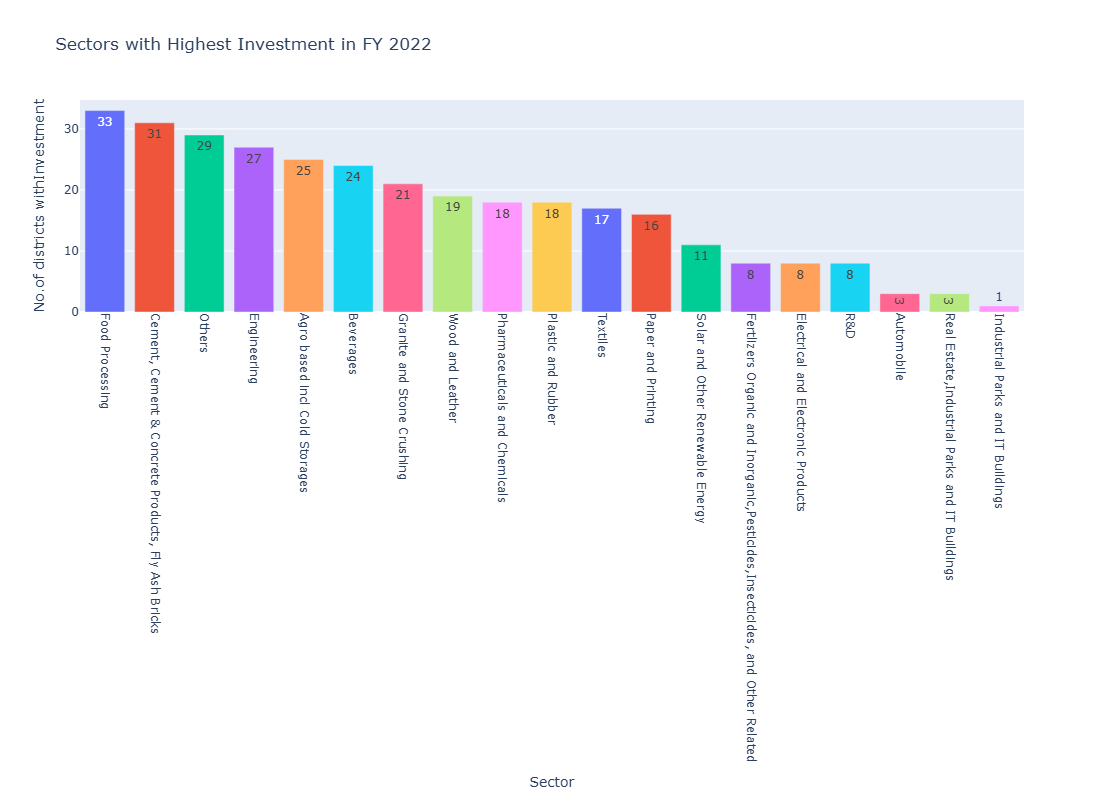

In [138]:
fig=px.bar(
    sector_growth,
    x='sector',
    y='num_districts_with_investment',
    text='num_districts_with_investment',
    color='sector',
    title='Sectors with Highest Investment in FY 2022',
    labels={'sector': 'Sector', 'num_districts_with_investment': 'No.of districts withInvestment '}
)
fig.update_layout(
    xaxis_tickangle=90,
    showlegend=False,
    height=800
)
fig.show()
    


Question-5

Can we identify any seasonal patterns or cyclicality in the  investment trends for specific sectors? Do certain sectors  experience higher investments during particular months? 


In [140]:
ipass_df_merged

,dist_code,month,sector,investment in cr,number_of_employees,Mmm,quarter,fiscal_year,district
0,14_1,2019-04-01,Engineering,2.3200,15,Apr,Q1,2019,Mahabubnagar
1,19_1,2019-04-01,Engineering,0.6250,13,Apr,Q1,2019,Adilabad
2,20_3,2019-04-01,Wood and Leather,0.2000,8,Apr,Q1,2019,Rajanna Sircilla
3,20_3,2019-04-01,Textiles,0.2675,27,Apr,Q1,2019,Rajanna Sircilla
4,21_5,2019-04-01,Electrical and Electronic Products,0.1200,5,Apr,Q1,2019,Mahabubabad
...,...,...,...,...,...,...,...,...,...
5748,20_4,2023-03-01,Engineering,0.1200,3,Mar,Q4,2022,Peddapalli
5749,20_4,2023-03-01,Food Processing,0.7509,9,Mar,Q4,2022,Peddapalli
5750,20_4,2023-03-01,Others,7.7500,10,Mar,Q4,2022,Peddapalli
5751,21_1,2023-03-01,Food Processing,0.3200,9,Mar,Q4,2022,Hanumakonda


In [141]:
ipass_monthly_investment=ipass_df_merged.groupby(['sector','Mmm'])['investment in cr'].sum().reset_index()

In [142]:
import pandas as pd

# Define the correct calendar month order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert your 'Mmm' column to an ordered categorical type
ipass_monthly_investment['Mmm'] = pd.Categorical(ipass_monthly_investment['Mmm'], categories=month_order, ordered=True)

# Sort the DataFrame by month
ipass_monthly_investment =ipass_monthly_investment.sort_values('Mmm')



In [143]:
ipass_monthly_investment

,sector,Mmm,investment in cr
170,"Real Estate,Industrial Parks and IT Buildings",Jan,1397.1700
38,"Cement, Cement & Concrete Products, Fly Ash Br...",Jan,39.6009
135,Pharmaceuticals and Chemicals,Jan,936.8535
147,Plastic and Rubber,Jan,1803.2376
111,Others,Jan,286.0004
...,...,...,...
109,Others,Dec,592.2874
192,Textiles,Dec,45.3775
133,Pharmaceuticals and Chemicals,Dec,2108.5187
96,Granite and Stone Crushing,Dec,83.7367


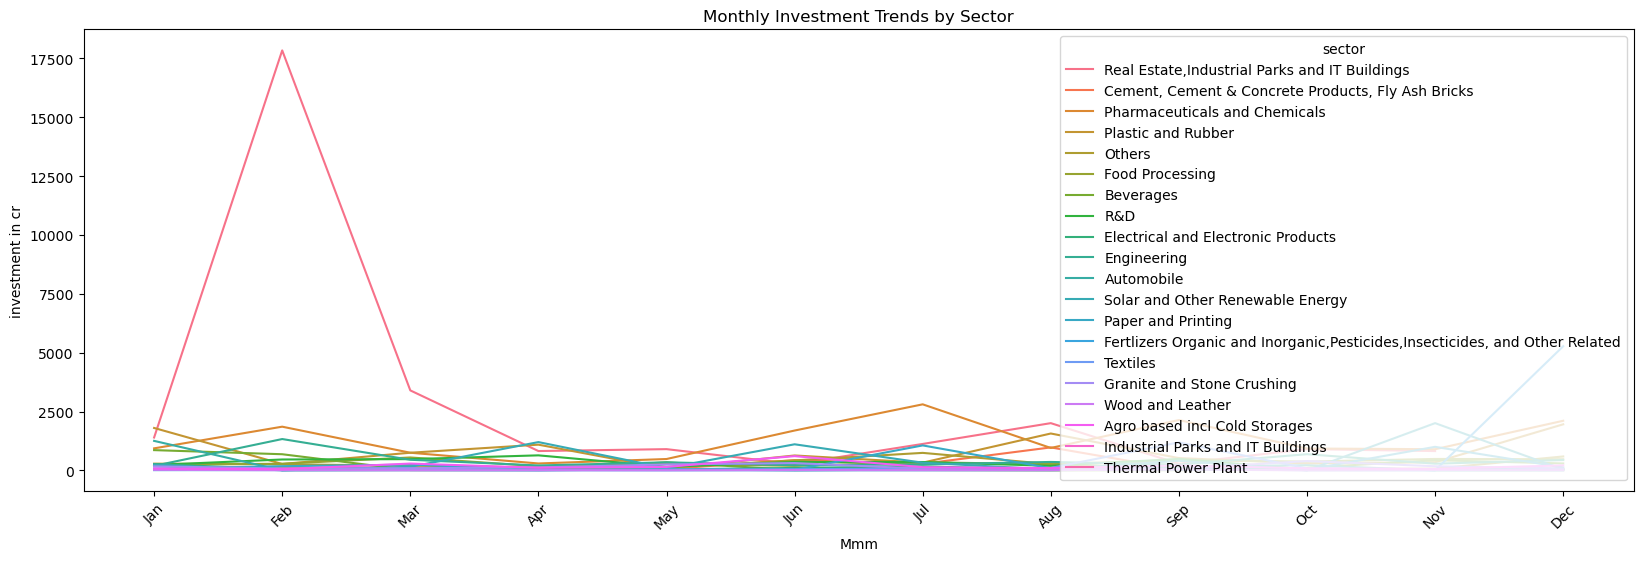

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
sns.lineplot(data=ipass_monthly_investment, x='Mmm', y='investment in cr', hue='sector')
plt.title('Monthly Investment Trends by Sector')
plt.xticks(rotation=45)
plt.show()


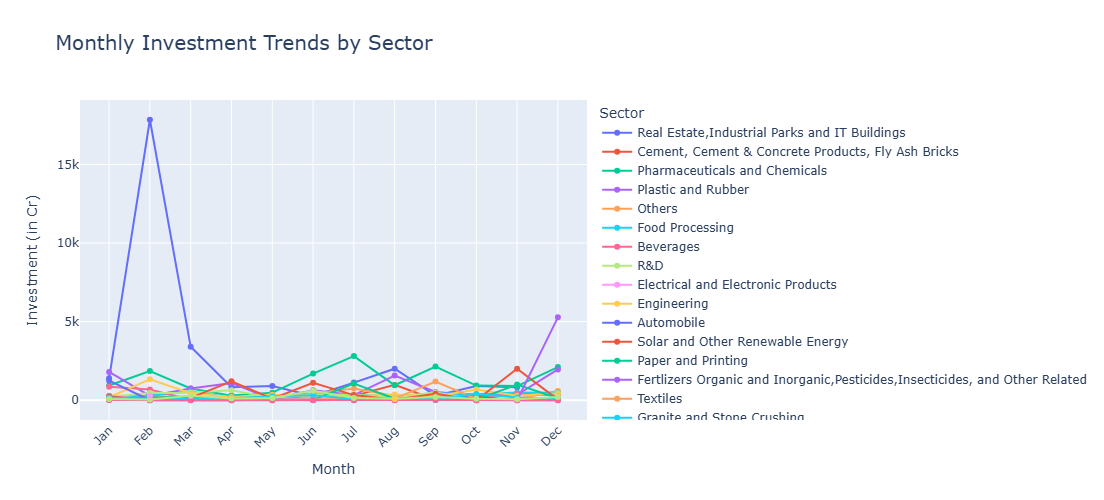

In [145]:
import plotly.express as px

fig = px.line(
    ipass_monthly_investment,
    x='Mmm',
    y='investment in cr',
    color='sector',
    title='Monthly Investment Trends by Sector',
    markers=True  # optional: adds dots on each line
)

fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Investment (in Cr)',
    width=1200,
    height=500,
    xaxis=dict(tickangle=-45),
    title_font_size=20,
    legend_title_text='Sector'
)

fig.show()
